In [1]:
import numpy as np
import tensorflow as tf
import h5py

In [6]:
train_dataset = h5py.File("datasets/train_catvnoncat.h5",'r')
test_dataset = h5py.File("datasets/test_catvnoncat.h5",'r')
images_train = np.array(train_dataset['train_set_x'][:])
labels_train = np.array(train_dataset['train_set_y'][:]).reshape(1,-1)
images_test = np.array(test_dataset['test_set_x'][:])
labels_test = np.array(test_dataset['test_set_y'][:]).reshape(1,-1)

In [7]:
print(images_train.shape , labels_train.shape , images_test.shape ,labels_test.shape,sep='\n')

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


In [5]:
X_train_m = images_train.T.reshape(-1,images_train.shape[0]).T
X_test_m = images_test.T.reshape(-1,images_test.shape[0]).T

In [6]:
X_train_ms =  X_train_m / 255
X_test_ms =  X_test_m / 255

In [173]:
X_train_ms.shape

(209, 12288)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="sigmoid",input_shape=(12288,))
])

In [8]:
#adam = tf.keras.optimizers.Adam(learning_rate = 0.005)
gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.005)
model.compile(optimizer = gd , loss = "binary_crossentropy" , metrics = ["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12289     
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
summary_model = model.fit(X_train_ms , tf.squeeze(labels_train) , epochs = 2000 , validation_data=(X_test_ms,tf.squeeze(labels_test)))

Epoch 1/2000
7/7 [==============================] - 2s 35ms/step - loss: 0.8288 - accuracy: 0.5407 - val_loss: 0.5911 - val_accuracy: 0.6800
Epoch 2/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.8943 - accuracy: 0.5359 - val_loss: 0.6017 - val_accuracy: 0.7800
Epoch 3/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.6181 - accuracy: 0.6555 - val_loss: 0.6380 - val_accuracy: 0.6600
Epoch 4/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.7436 - accuracy: 0.6316 - val_loss: 0.6828 - val_accuracy: 0.6600
Epoch 5/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.1793 - accuracy: 0.5024 - val_loss: 2.0835 - val_accuracy: 0.3400
Epoch 6/2000
7/7 [==============================] - 0s 12ms/step - loss: 1.0533 - accuracy: 0.5742 - val_loss: 1.0054 - val_accuracy: 0.3600
Epoch 7/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.7938 - accuracy: 0.6029 - val_loss: 0.5169 - val_accuracy: 0.7600
Epoch 8/2000
7/7

- this result is very better than manual result

In [32]:
model_image = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [33]:
gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.005)
model_image.compile(optimizer=gd,loss = tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [126]:
#model_image.summary()

In [34]:
summary_model_image = model_image.fit(images_train, tf.squeeze(labels_train) , epochs =2000 , validation_data = (images_test , tf.squeeze(labels_test)))

Epoch 1/2000
7/7 [==============================] - 0s 32ms/step - loss: 76143.1406 - accuracy: 0.5167 - val_loss: 239122.7344 - val_accuracy: 0.3400
Epoch 2/2000
7/7 [==============================] - 0s 10ms/step - loss: 78466.4375 - accuracy: 0.5502 - val_loss: 39156.5586 - val_accuracy: 0.6600
Epoch 3/2000
7/7 [==============================] - 0s 10ms/step - loss: 74723.6875 - accuracy: 0.5215 - val_loss: 114479.5234 - val_accuracy: 0.3400
Epoch 4/2000
7/7 [==============================] - 0s 7ms/step - loss: 75656.4375 - accuracy: 0.5407 - val_loss: 36932.6758 - val_accuracy: 0.6600
Epoch 5/2000
7/7 [==============================] - 0s 7ms/step - loss: 73851.8906 - accuracy: 0.5502 - val_loss: 5971.5977 - val_accuracy: 0.8200
Epoch 6/2000
7/7 [==============================] - 0s 7ms/step - loss: 40846.7461 - accuracy: 0.5933 - val_loss: 26903.7832 - val_accuracy: 0.6600
Epoch 7/2000
7/7 [==============================] - 0s 7ms/step - loss: 61117.6641 - accuracy: 0.5933 - val_

In [35]:
model_image.predict(images_test)

2/2 [==============================] - 0s 5ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.005)

In [23]:
summary_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
import matplotlib.pyplot as plt

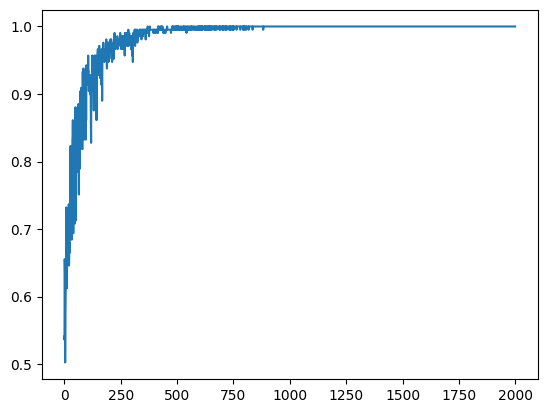

In [25]:
plt.plot(summary_model.history["accuracy"])

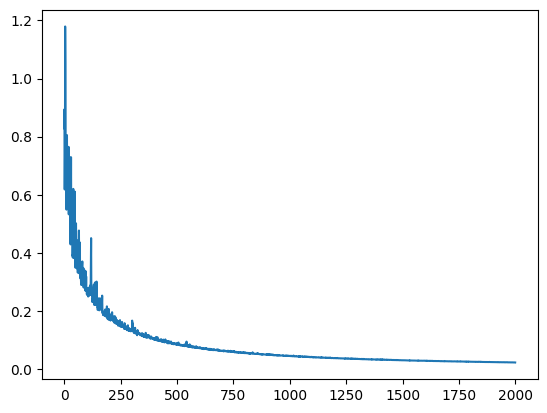

In [27]:
plt.plot(summary_model.history["loss"])

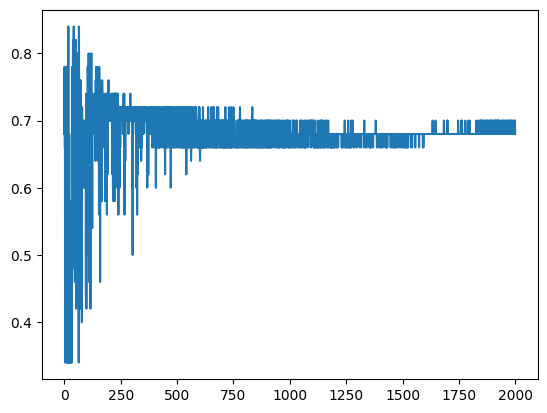

In [28]:
plt.plot(summary_model.history["val_accuracy"])

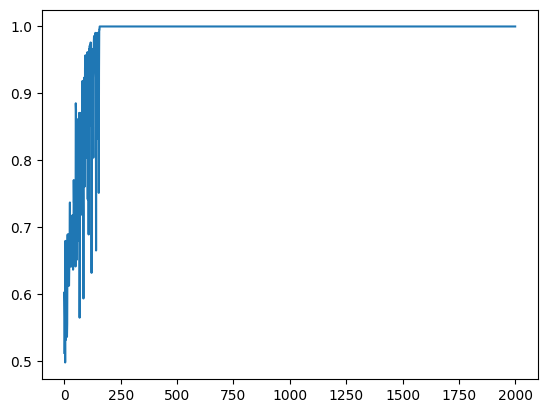

In [29]:
plt.plot(summary_model_image.history["accuracy"])

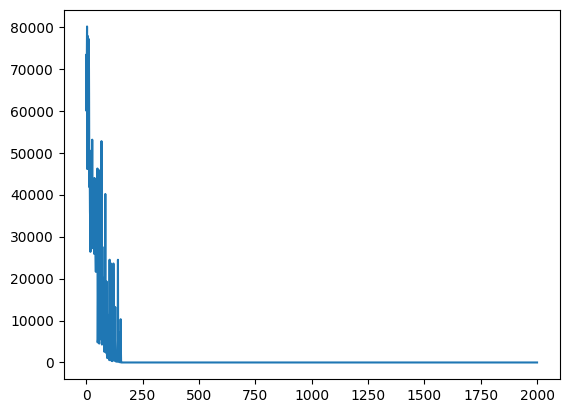

In [30]:
plt.plot(summary_model_image.history["loss"])

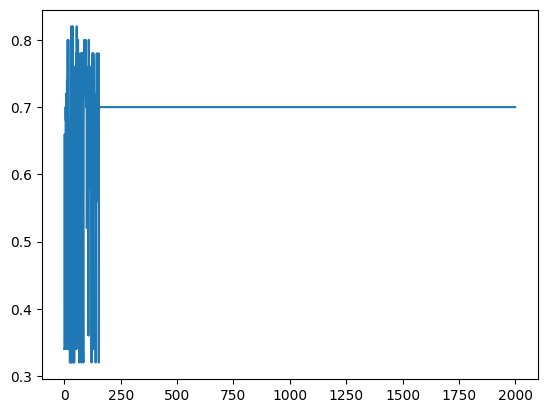

In [31]:
plt.plot(summary_model_image.history["val_accuracy"])

In [35]:
shallow_net = tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation="sigmoid",input_shape=(12288,)),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [36]:
shallow_net.compile(optimizer = gd ,loss="binary_crossentropy" , metrics=["accuracy"])

In [37]:
shallow_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36867     
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 36871 (144.03 KB)
Trainable params: 36871 (144.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history_shallow_net  = shallow_net.fit(X_train_ms,tf.squeeze(labels_train),epochs=2000,validation_data=(X_test_ms,tf.squeeze(labels_test)))

Epoch 1/2000
7/7 [==============================] - 1s 31ms/step - loss: 0.7040 - accuracy: 0.4211 - val_loss: 0.7104 - val_accuracy: 0.3800
Epoch 2/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6792 - accuracy: 0.6172 - val_loss: 0.7317 - val_accuracy: 0.3400
Epoch 3/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6698 - accuracy: 0.6507 - val_loss: 0.7430 - val_accuracy: 0.3400
Epoch 4/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.6653 - accuracy: 0.6507 - val_loss: 0.7509 - val_accuracy: 0.3400
Epoch 5/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.6620 - accuracy: 0.6555 - val_loss: 0.7561 - val_accuracy: 0.3400
Epoch 6/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.6601 - accuracy: 0.6507 - val_loss: 0.7600 - val_accuracy: 0.3400
Epoch 7/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.6586 - accuracy: 0.6507 - val_loss: 0.7631 - val_accuracy: 0.3400
Epoch 8/2000
7/7 

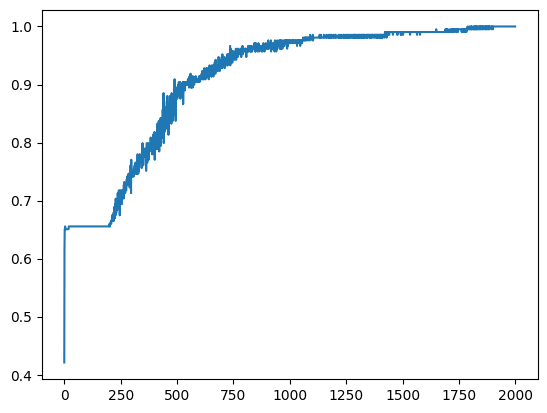

In [39]:
plt.plot(history_shallow_net.history["accuracy"])

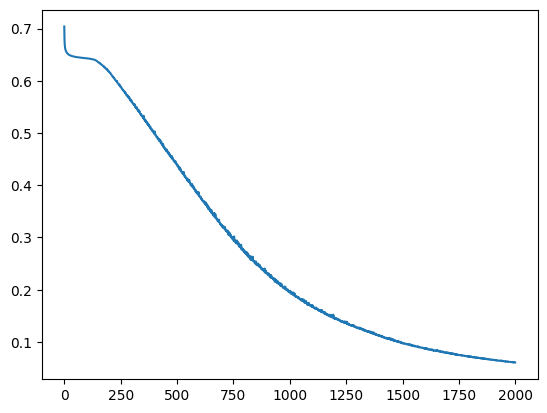

In [40]:
plt.plot(history_shallow_net.history["loss"])

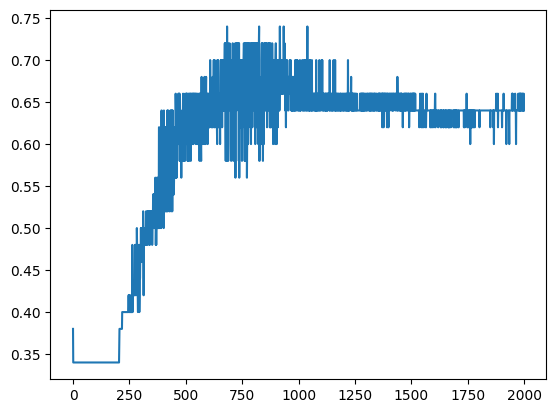

In [41]:
plt.plot(history_shallow_net.history["val_accuracy"])

In [69]:
shallow_net_tanh = tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation="tanh",input_shape=(12288,)),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [70]:
shallow_net_tanh.compile(optimizer = gd ,loss="binary_crossentropy" , metrics=["accuracy"])

In [71]:
shallow_net_tanh.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 36867     
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 36871 (144.03 KB)
Trainable params: 36871 (144.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
history_shallow_net_tanh  = shallow_net_tanh.fit(X_train_ms,tf.squeeze(labels_train),epochs=2000,validation_data=(X_test_ms,tf.squeeze(labels_test)))

Epoch 1/2000
7/7 [==============================] - 1s 38ms/step - loss: 0.7408 - accuracy: 0.6077 - val_loss: 0.7984 - val_accuracy: 0.3400
Epoch 2/2000
7/7 [==============================] - 0s 16ms/step - loss: 0.6311 - accuracy: 0.6555 - val_loss: 0.7481 - val_accuracy: 0.3400
Epoch 3/2000
7/7 [==============================] - 0s 15ms/step - loss: 0.6187 - accuracy: 0.6555 - val_loss: 0.9157 - val_accuracy: 0.3400
Epoch 4/2000
7/7 [==============================] - 0s 12ms/step - loss: 0.6165 - accuracy: 0.6555 - val_loss: 0.7348 - val_accuracy: 0.3400
Epoch 5/2000
7/7 [==============================] - 0s 12ms/step - loss: 0.6073 - accuracy: 0.6555 - val_loss: 0.8231 - val_accuracy: 0.3400
Epoch 6/2000
7/7 [==============================] - 0s 14ms/step - loss: 0.6165 - accuracy: 0.6555 - val_loss: 0.7370 - val_accuracy: 0.3400
Epoch 7/2000
7/7 [==============================] - 0s 14ms/step - loss: 0.5921 - accuracy: 0.6555 - val_loss: 0.7117 - val_accuracy: 0.4000
Epoch 8/2000


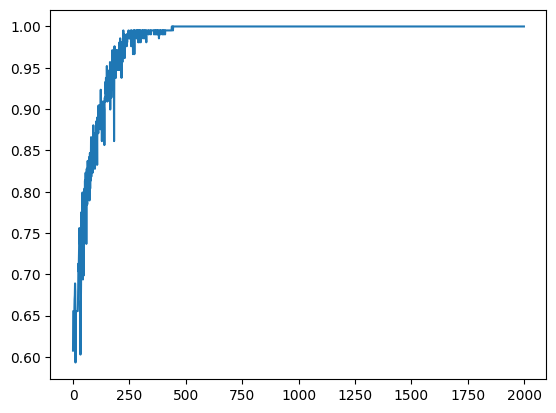

In [83]:
plt.plot(history_shallow_net_tanh.history["accuracy"])

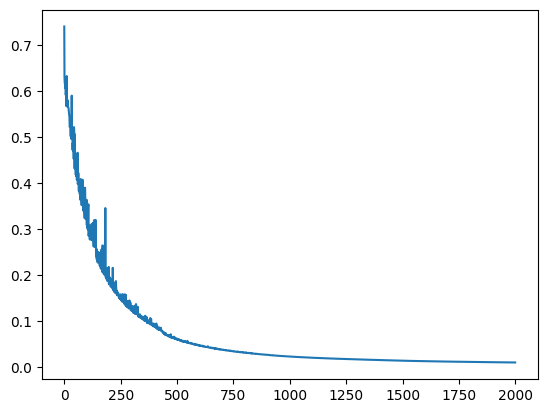

In [84]:
plt.plot(history_shallow_net_tanh.history["loss"])

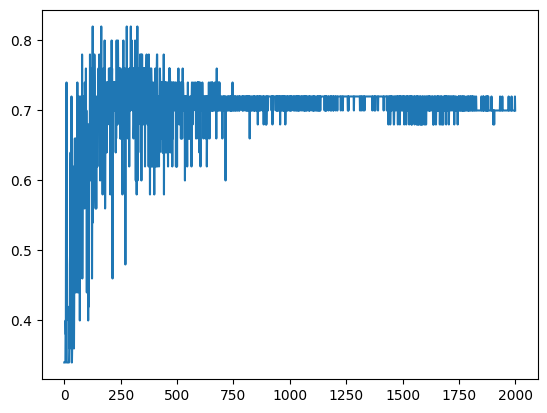

In [85]:
plt.plot(history_shallow_net_tanh.history["val_accuracy"])

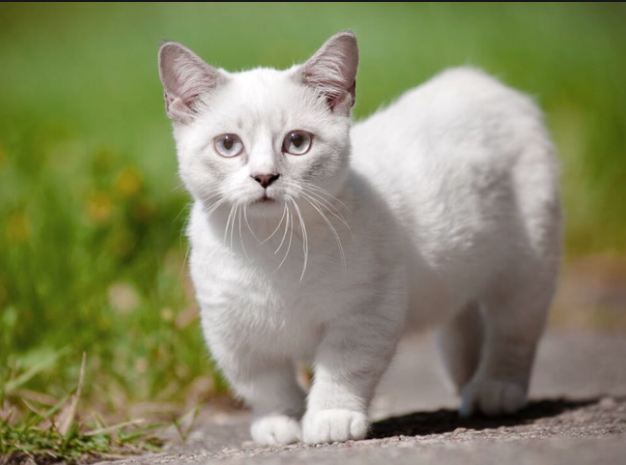

In [86]:
## a real cat image
from PIL import Image

png = Image.open("images/cat.png")

png

(-0.5, 63.5, 63.5, -0.5)

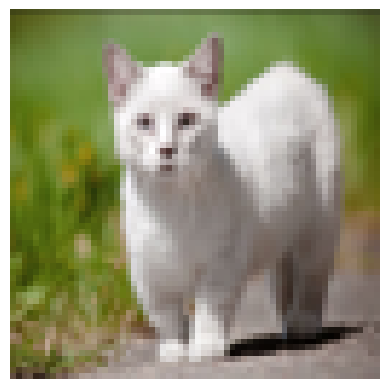

In [87]:
png.load()

# convert an RGBA to RGB
background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background.save('foo.jpg', 'JPEG', quality=80)

image = background.resize((64,64))

array = np.array(image)#.T.reshape(-1,1)

plt.imshow(array)
plt.axis("off")

In [89]:
inp =array.T.reshape(12288,1).T/255.

In [58]:
shallow_net.predict(inp)

1/1 [==============================] - 0s 57ms/step


array([[0.09022671]], dtype=float32)

In [59]:
model.predict(inp)

1/1 [==============================] - 0s 97ms/step


array([[0.11580438]], dtype=float32)

In [68]:
model_image.predict(array.reshape(1,64, 64, 3))

1/1 [==============================] - 0s 88ms/step


array([[0.]], dtype=float32)

In [91]:
shallow_net_tanh.predict(inp)

1/1 [==============================] - 0s 53ms/step


array([[0.01902102]], dtype=float32)

_ tanh net work better than sigmoid

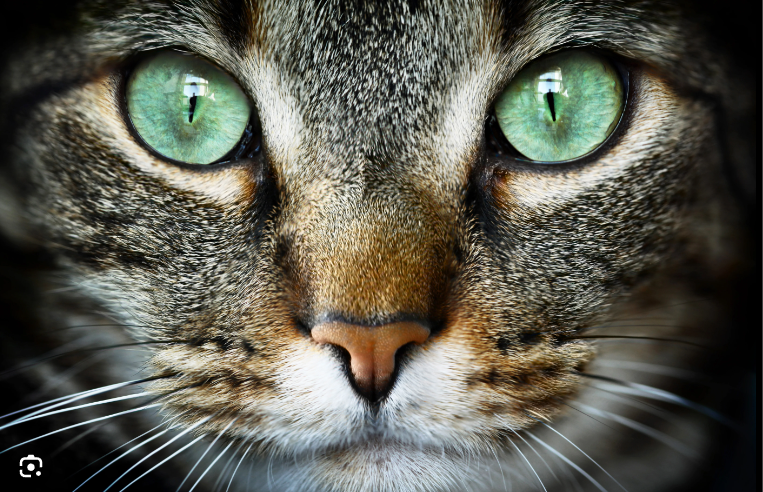

In [92]:
## a real cat image
from PIL import Image

png = Image.open("images/cat_2.png")

png

(-0.5, 63.5, 63.5, -0.5)

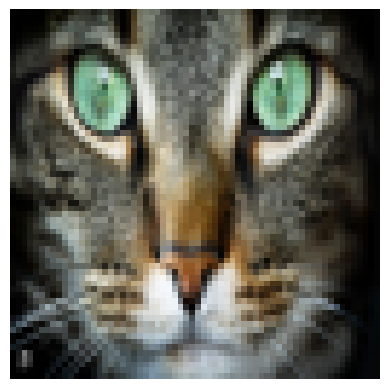

In [93]:
png.load()

# convert an RGBA to RGB
background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background.save('foo.jpg', 'JPEG', quality=80)

image = background.resize((64,64))

array = np.array(image)#.T.reshape(-1,1)

plt.imshow(array)
plt.axis("off")

In [78]:
array.shape

(64, 64, 3)

In [79]:
inp =array.T.reshape(12288,1).T/255.

In [80]:
shallow_net.predict(inp)

1/1 [==============================] - 0s 39ms/step


array([[0.53870755]], dtype=float32)

In [94]:
model.predict(inp)

1/1 [==============================] - 0s 19ms/step


array([[0.11580438]], dtype=float32)

In [97]:
array.shape

(64, 64, 3)

In [108]:
model_image.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 normalization_1 (Normaliza  (None, 12288)             24577     
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 1)                 12289     
                                                                 
Total params: 36866 (144.01 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 24577 (96.01 KB)
_________________________________________________________________


In [148]:
probability_model = tf.keras.Sequential([model_image,
                                         tf.keras.layers.Softmax()
])

In [180]:
model_image.predict(inp)

1/1 [==============================] - 0s 17ms/step


array([[0.16709949]], dtype=float32)

In [178]:
model_image.predict(X_test_ms)

2/2 [==============================] - 0s 10ms/step


array([[9.8360968e-01],
       [9.5847583e-01],
       [9.2003495e-01],
       [9.8193961e-01],
       [7.9082334e-01],
       [5.2162063e-01],
       [2.6498451e-03],
       [8.7913078e-01],
       [8.8760352e-01],
       [6.8128574e-01],
       [9.8469131e-02],
       [3.1207103e-01],
       [7.5362182e-01],
       [8.9072770e-01],
       [9.9726871e-04],
       [9.7370863e-01],
       [4.9345465e-03],
       [9.3611032e-01],
       [8.0739304e-02],
       [3.1736721e-03],
       [9.8819798e-01],
       [1.0664986e-01],
       [7.5015635e-04],
       [9.2747808e-01],
       [4.5306578e-01],
       [6.2426704e-01],
       [9.0997607e-01],
       [1.0450782e-03],
       [3.2887596e-03],
       [9.9957460e-01],
       [5.2631482e-02],
       [8.4256184e-01],
       [6.0762566e-01],
       [4.9842960e-01],
       [5.9647036e-01],
       [5.2797734e-03],
       [1.9641887e-02],
       [7.5235772e-01],
       [1.8297304e-01],
       [1.5781235e-02],
       [8.4432441e-01],
       [2.005532

In [181]:
shallow_net_tanh.predict(inp)

1/1 [==============================] - 0s 18ms/step


array([[0.01902102]], dtype=float32)